In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io

In [62]:
data = scipy.io.loadmat('HW4Data.mat')

In [63]:
XTrain = data['XTrain']
yTrain = data['yTrain']
XTest = data['XTest']
yTest = data['yTest']

In [64]:
# appending the 1 in the matrix XTrain for accounting w0 or bias term
XTrain = np.concatenate((np.ones((500,1)), XTrain), axis=1)
XTest = np.concatenate((np.ones((XTest.shape[0],1)), XTest), axis=1)
print XTest.shape

(200, 11)


In [65]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [66]:
# Computing the cost function for that I will need the sigmoid function defined above
# For that i need to compute the hypothesis function which is sigmoid function
def CalcObj(X, Y, W):
    XW = X.dot(W)
    expXW = np.exp(XW)
    loss = np.sum(Y*XW - np.log(1 + expXW))
    return loss

In [67]:
# Vectorized implementation of gradients
def grad(X, Y, W):
    XW = X.dot(W)
    expXW = np.exp(XW)
    gradients = (Y - (expXW / (1 + expXW))).T.dot(X)
    return gradients.T

In [68]:
# Code for Updating the parameters using the gradient ascent rule
def update_Params(w, grad, eta):
    return (w + eta * grad)

In [69]:
# Code for checking the convergence of gradient ascent
def check_convergence(oldloss, newloss, tol):
    diff = abs(newloss - oldloss)
    if diff <= tol:
        return True
    else:
        return False

In [70]:
# With all the basic function or components of gradient ascent ready we can actually implement the function
def grad_ascent(X, Y):
    W = np.zeros((X.shape[1], 1))
    objvals = list()
    while(True):
        oldobj = CalcObj(X, Y, W)
        objvals.append(oldobj)
        gradient = grad(X, Y, W)
        W = update_Params(W, gradient, eta = 0.01)
        newobj = CalcObj(X, Y, W)
        objvals.append(newobj)
        if(check_convergence(oldobj, newobj, tol=0.001)):
            break
    return W, objvals

In [94]:
# test the logistic regression
print params
params, losses = grad_ascent(XTrain, yTrain)
ys = XTest.dot(params)
y1 = [ys >= 0]
print yTest.shape[0] - (np.sum(y1 == yTest))

[[ 1.90925168]
 [-3.0411727 ]
 [-2.8052387 ]
 [-0.05692208]
 [ 0.07246369]
 [ 0.05887273]
 [ 0.52774965]
 [-0.12513022]
 [ 0.11121092]
 [-0.16415402]
 [-0.28831574]]
13


Number of iterations required are: 174


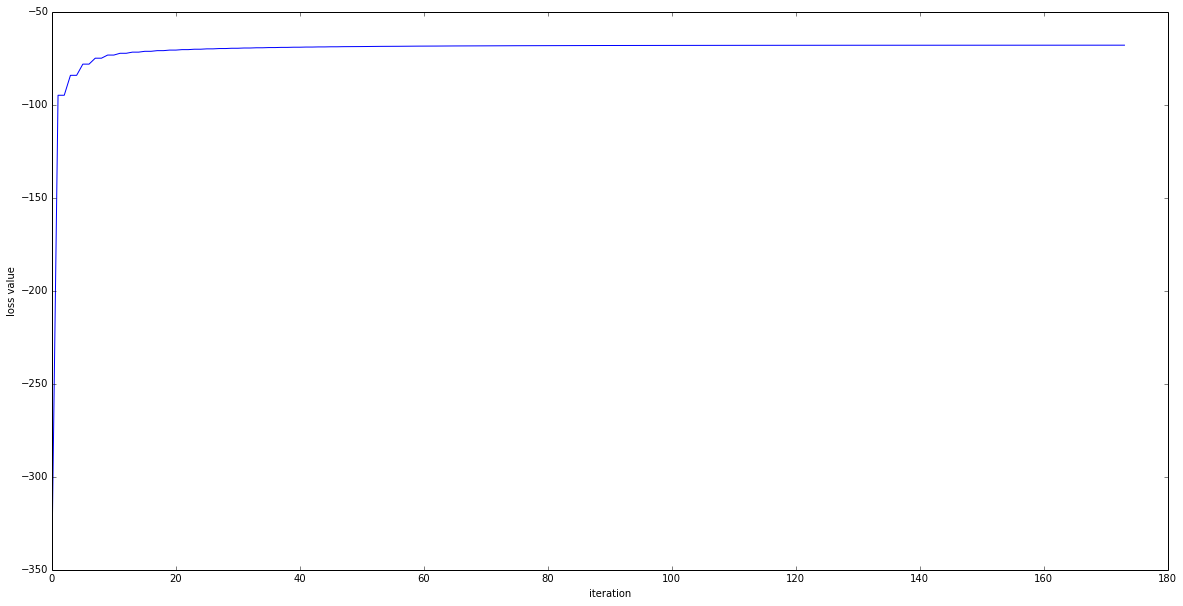

In [96]:
# Visualising how loss changes at each iteration.
print "Number of iterations required are:", len(losses)
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('iteration')
plt.ylabel('loss value')

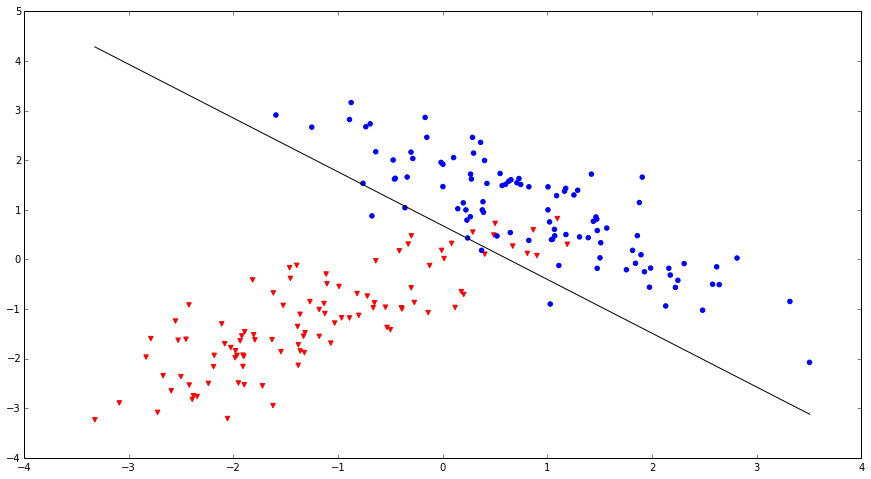

In [134]:
# Code for Extra credit problem
# First getting the two highest value in params
# the thing i am using to do this is slow, but i am too tired at this point to do something cool
max_ind = np.abs(params).reshape(11).argsort()[-2:][::-1]
y1 = yTest == 1
y0 = yTest == 0
y1 = y1.reshape(200)
x_axis1 = XTest[y1, max_ind[0]]
y_axis1 = XTest[y1, max_ind[1]]
plt.figure(figsize=(15,8))
plt.scatter(x_axis1, y_axis1, color='r', marker='v')
y0 = y0.reshape(200)
x_axis0 = XTest[y0, max_ind[0]]
y_axis0 = XTest[y0, max_ind[1]]
plt.scatter(x_axis0, y_axis0, color='b', marker='o')

# Now lets plot the separating plane which is just a line
params = params.reshape(params.shape[0])
x_axis = np.linspace(np.min(XTest[:,max_ind[0]]), np.max(XTest[:,max_ind[0]]), 100)
y_axis = -(params[0] + params[max_ind[0]] * x_axis) / params[max_ind[1]]
plt.plot(x_axis, y_axis, color='black')